# Figure 5: Compare Repro with PB for hypothesis testing on the slope in linear regression with different levels of the true slope

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import CenteredNorm

In [3]:
def transform_data(gdp):
    gdp = str(gdp)
    sample_size_list = []
    beta1_list = []
    rejection_prob_list = []
    method_list = []
    method_dict = {'Repro': 'Repro Sample', 'PB':'Parametric Bootstrap'}
    
    for method in ['Repro', 'PB']:
        csv_path = './results/' + method + '_LR_HT/' + method + '_LR_HT-clamp_2-gdp_ep=' + gdp + '-alpha=0.05-X_mu=0.5-tau=1-beta=(-0.5, b1)-sa=0.5-R=200-reps=1000.csv'
        dataset = pd.read_csv(csv_path)
        for i in range(dataset.shape[0]):
            for j in range(dataset.shape[1]):
                sample_size = dataset.columns[j]
                beta1 = dataset.index[i]
                rejection_prob = dataset[sample_size][beta1]

                sample_size_list.append(int(sample_size))
                beta1_list.append((beta1))
                rejection_prob_list.append(round(rejection_prob, 3))
                method_list.append(method_dict[method])
            
    # dataset = pd.DataFrame(np.array([sample_size_list, beta1_list, rejection_prob_list, method_list]).transpose(),
                   # columns=['sample_size', 'beta1', 'rejection_prob', 'method'])
            
    dataset = pd.DataFrame({'sample_size': sample_size_list, 
                           'beta1': beta1_list, 
                           'rejection_prob': rejection_prob_list,
                           'method': method_list})
    return dataset
    # return dataset.pivot('sample_size', 'beta1', 'rejection_prob')
gdp1_data = transform_data(1)

/Users/wang4094/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


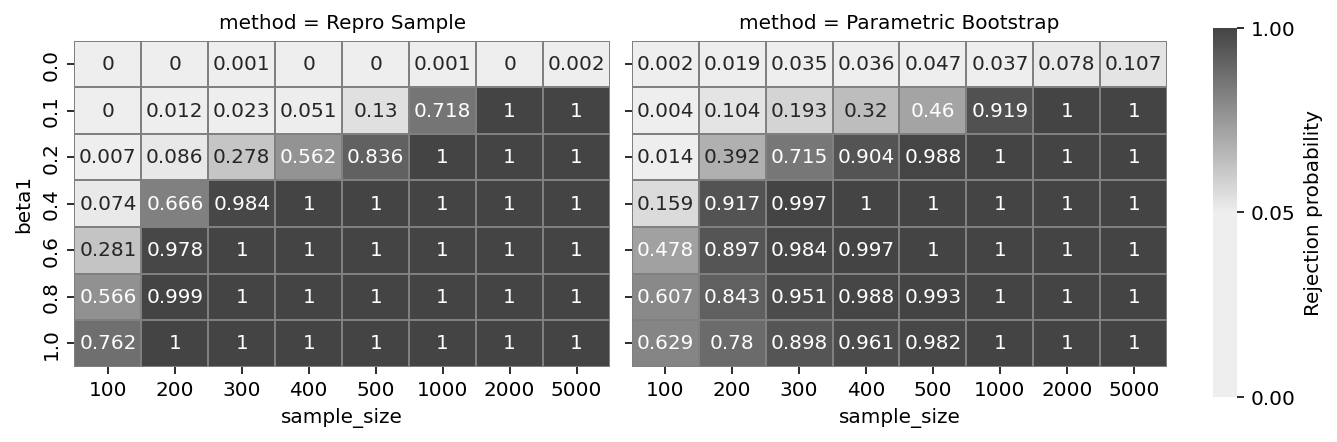

In [4]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    # if (list(data['method'])[0] != 'Repro'):
    ax = sns.heatmap(d, **kwargs, linewidths=1, fmt='g', linecolor='grey')
    
fg = sns.FacetGrid(gdp1_data, col='method', height=3.2, aspect=1.3)
# rdgn = sns.color_palette("blend:#ffffff,#ffffff,#a1c9f4", as_cmap=True)
rdgn = sns.color_palette("blend:#eeeeee,#eeeeee,#444444", as_cmap=True)
divnorm = TwoSlopeNorm(vmin=0, vcenter=0.05, vmax=1)

cax = fg.fig.add_axes([1.02, .12, .02, .8])
fg.map_dataframe(draw_heatmap, 'sample_size', 'beta1', 'rejection_prob', 
                 annot=True, 
                 cbar_ax=cax,
                 cbar_kws={'label': 'Rejection probability', 
                           "ticks":[0, 0.05,1]}, 
                 cmap=rdgn, norm=divnorm) 

plt.savefig('LR_HT_gdp=1.pdf', bbox_extra_artists=(cax,),  bbox_inches='tight')

# Appendix Figure 1 and 2: Use Repro and PB for hypothesis testing on linear regression with different privacy constraints

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import CenteredNorm

In [9]:
def transform_data2(method):
    sample_size_list = []
    beta1_list = []
    rejection_prob_list = []
    gdp_list = []
    
    # for method in ['Repro', 'PB']:
    for gdp in [10, 5, 2, 0.5, 0.2, 0.1, 0.05, 0.01]:
        gdp = str(gdp)
        csv_path = './results/' + method + '_LR_HT/' + method + '_LR_HT-clamp_2-gdp_ep=' + gdp + '-alpha=0.05-X_mu=0.5-tau=1-beta=(-0.5, b1)-sa=0.5-R=200-reps=1000.csv'
        dataset = pd.read_csv(csv_path)
        for i in range(dataset.shape[0]):
            for j in range(dataset.shape[1]):
                sample_size = dataset.columns[j]
                beta1 = dataset.index[i]
                rejection_prob = dataset[sample_size][beta1]

                sample_size_list.append(int(sample_size))
                beta1_list.append((beta1))
                rejection_prob_list.append(round(rejection_prob, 3))
                gdp_list.append(gdp)
            
    # dataset = pd.DataFrame(np.array([sample_size_list, beta1_list, rejection_prob_list, method_list]).transpose(),
                   # columns=['sample_size', 'beta1', 'rejection_prob', 'method'])
            
    dataset = pd.DataFrame({'sample_size': sample_size_list, 
                           'beta1': beta1_list, 
                           'rejection_prob': rejection_prob_list,
                           'gdp_mu': gdp_list})
    return dataset
    # return dataset.pivot('sample_size', 'beta1', 'rejection_prob')

/Users/wang4094/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
/Users/wang4094/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


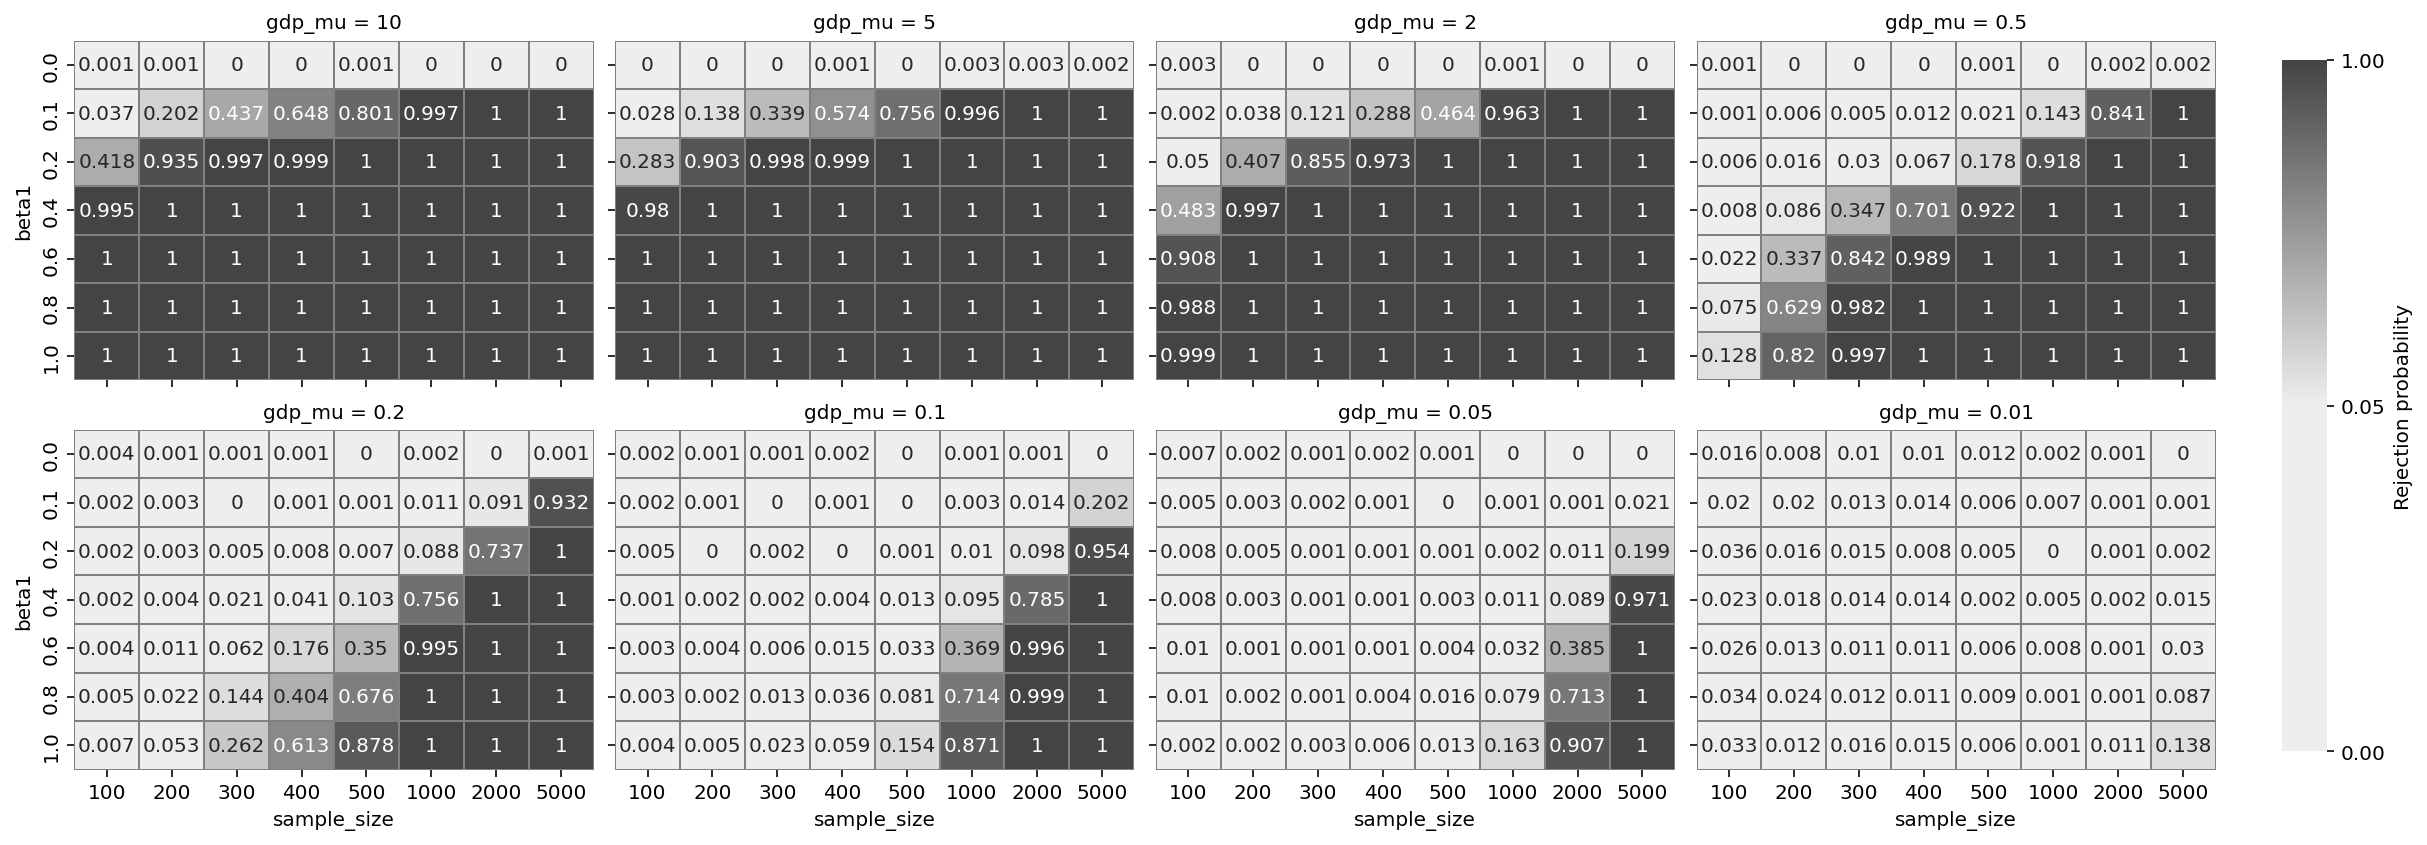

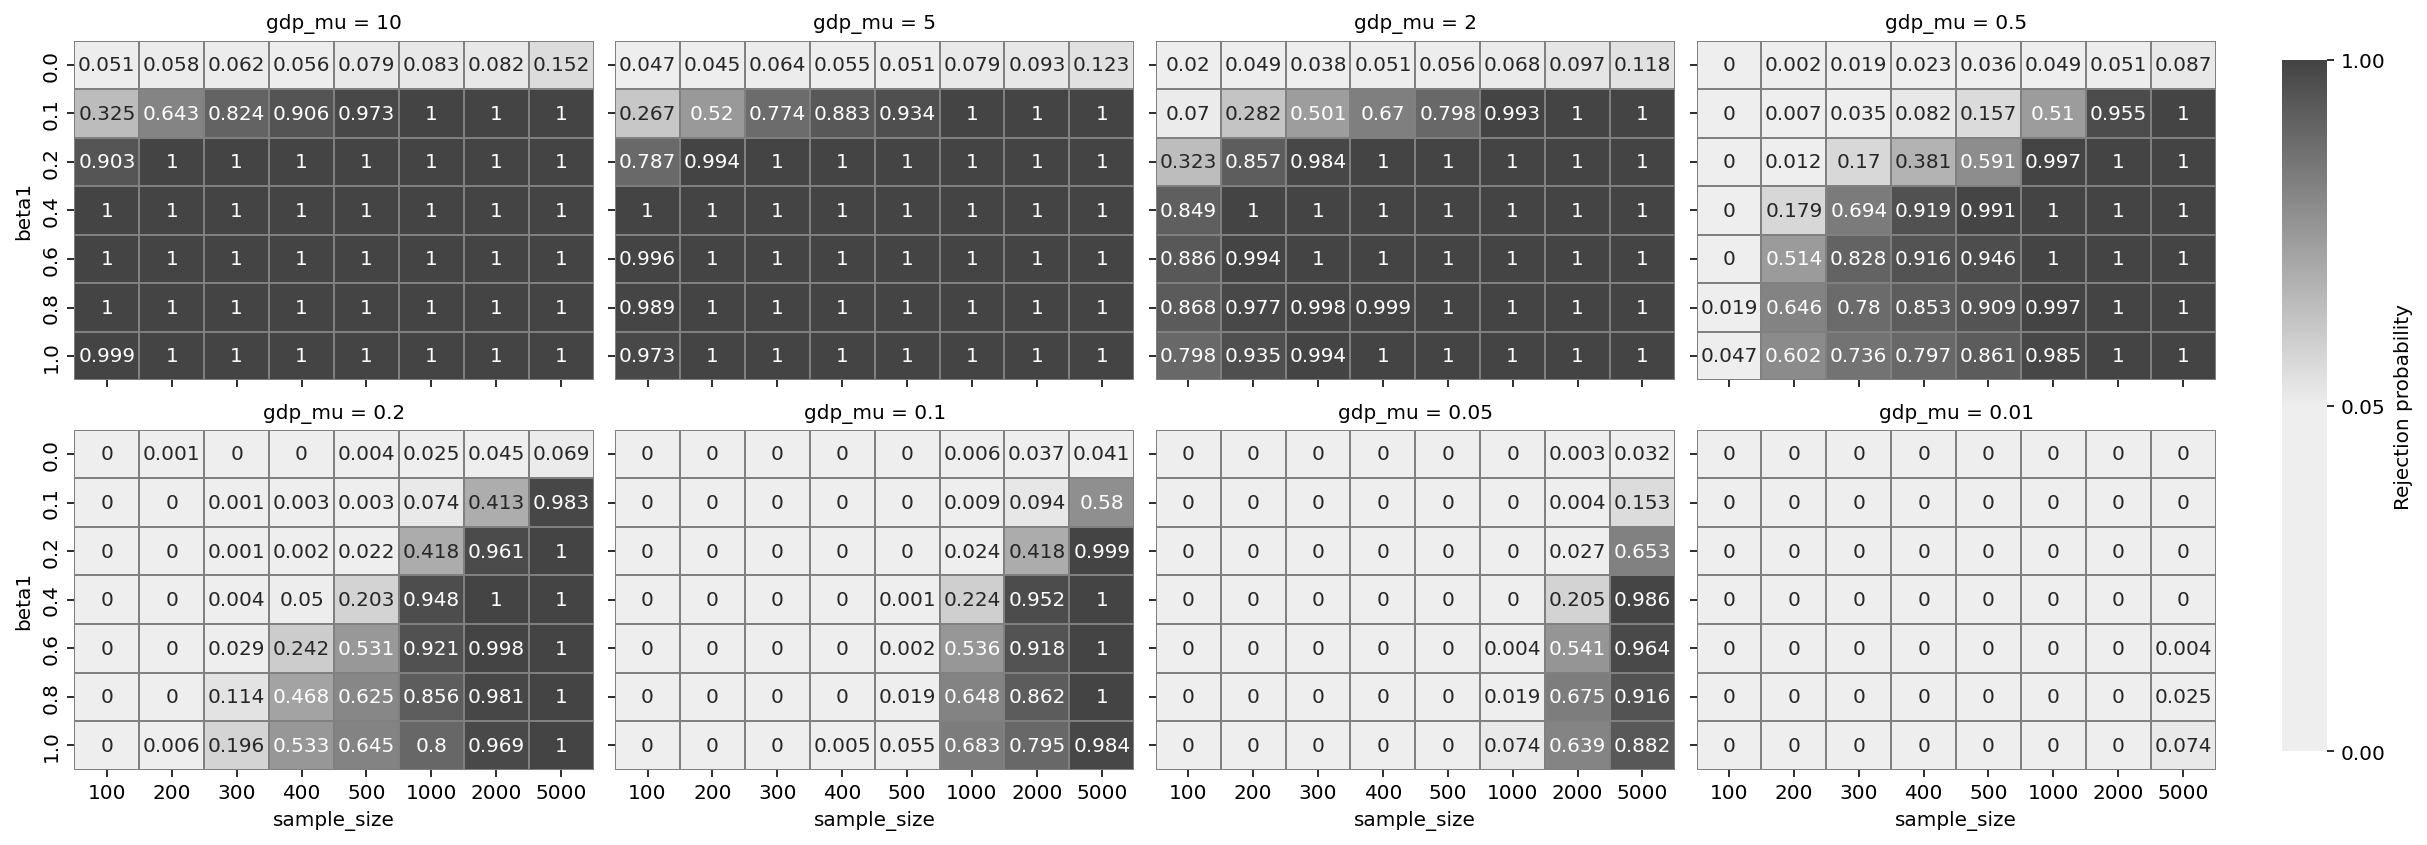

In [10]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    # if (list(data['method'])[0] != 'Repro'):
    # ax = sns.heatmap(d, **kwargs)
    ax = sns.heatmap(d, **kwargs, linewidths=1, fmt='g', linecolor='grey')
    
for method in ['Repro', 'PB']:
    repro_data = transform_data2(method)
    fg = sns.FacetGrid(repro_data, col='gdp_mu', height=3, aspect=1.3, col_wrap=4) # , sharey=False
    rdgn = sns.diverging_palette(h_neg=240, h_pos=10, s=50, l=55, sep=1, as_cmap=True)
    rdgn = sns.color_palette("blend:#eeeeee,#eeeeee,#444444", as_cmap=True)
    divnorm = TwoSlopeNorm(vmin=0, vcenter=0.05, vmax=1)

    cax = fg.fig.add_axes([1.02, .12, .02, .8])
    fg = fg.map_dataframe(draw_heatmap, 'sample_size', 'beta1', 'rejection_prob', 
                     annot=True, 
                     cbar_ax=cax,
                     cbar_kws={'label': 'Rejection probability', 
                               "ticks":[0, 0.05,1]}, 
                     cmap=rdgn, norm=divnorm) 
    # fg.fig.suptitle('Overall Title')

    plt.savefig(method + '_LR_HT.pdf', bbox_extra_artists=(cax,),  bbox_inches='tight')

# Figure 6: Compare Repro with PB for hypothesis testing on the slope in linear regression with different clamping regions

In [9]:
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import CenteredNorm

In [10]:
def transform_data3():
    sample_size_list = []
    beta1_list = []
    rejection_prob_list = []
    method_list = []
    method_dict = {'Repro': 'Repro Sample', 'PB':'Parametric Bootstrap'}
    clamp_list = []
    
    for method in ['Repro', 'PB']:
        for clamp in [0.5, 0.8, 1, 1.5, 2, 5, 10]:
            csv_path = './results/compare_clamp/' + method + '_LR_HT-clamp_' + str(clamp) + '-gdp_ep=1-alpha=0.05-X_mu=0.5-tau=1-beta=(-0.5, b1)-sa=0.5-R=200-reps=1000.csv'
            dataset = pd.read_csv(csv_path)
            for i in range(dataset.shape[0]):
                for j in range(dataset.shape[1]):
                    beta1 = dataset.index[i]
                    sample_size = dataset.columns[j]
                    rejection_prob = dataset[sample_size][beta1]

                    sample_size_list.append(int(sample_size))
                    clamp_list.append((clamp))
                    rejection_prob_list.append(round(rejection_prob, 3))
                    method_list.append(method_dict[method] + ' (beta1=' + str(beta1) + ')')
            
    # dataset = pd.DataFrame(np.array([sample_size_list, beta1_list, rejection_prob_list, method_list]).transpose(),
                   # columns=['sample_size', 'beta1', 'rejection_prob', 'method'])
            
    dataset = pd.DataFrame({'sample_size': sample_size_list, 
                           'clamp': clamp_list, 
                           'rejection_prob': rejection_prob_list,
                           'method': method_list})
    return dataset
    # return dataset.pivot('sample_size', 'beta1', 'rejection_prob')

/Users/wang4094/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


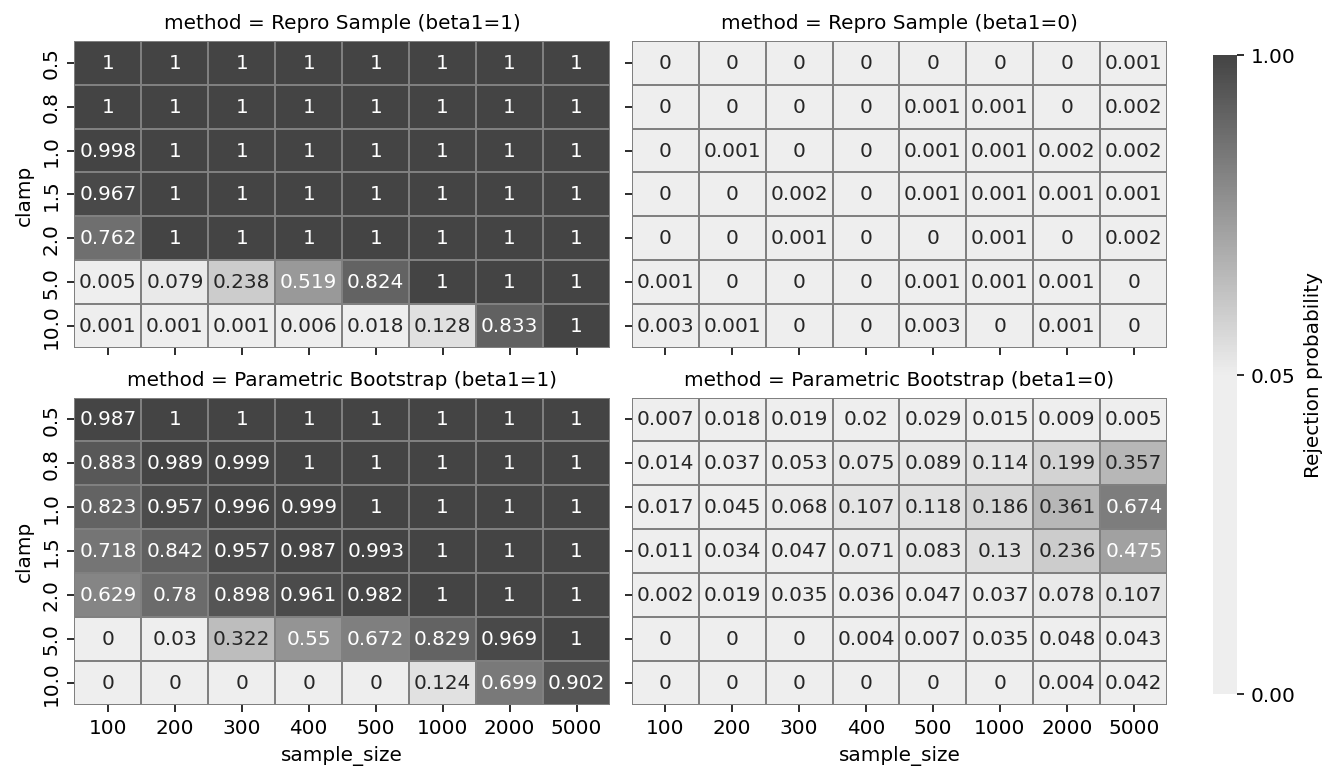

In [11]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    # if (list(data['method'])[0] != 'Repro'):
    ax = sns.heatmap(d, **kwargs, linewidths=1, fmt='g', linecolor='grey')

for beta1 in [1.0]: # , 0.0
    fg = sns.FacetGrid(transform_data3(), col='method', height=4.16/1.5, aspect=1.5, col_wrap=2)
    # rdgn = sns.diverging_palette(h_neg=240, h_pos=10, s=50, l=55, sep=1, as_cmap=True)
    # rdgn = sns.hls_palette(8, l=.3, s=.8)
    # rdgn = sns.light_palette("#79C", as_cmap=True) # n_colors=6, 
    rdgn = sns.color_palette("blend:#eeeeee,#eeeeee,#444444", as_cmap=True)
    divnorm = TwoSlopeNorm(vmin=0, vcenter=0.05, vmax=1)
    # divnorm = CenteredNorm(vcenter=0.05)

    cax = fg.fig.add_axes([1.02, .12, .02, .8])
    fg.map_dataframe(draw_heatmap, 'sample_size', 'clamp', 'rejection_prob', 
                    annot=True, 
                    cbar_ax=cax,
                    cbar_kws={'label': 'Rejection probability', 
                            "ticks":[0, 0.05,1]}, 
                    cmap=rdgn, norm=divnorm) 

    plt.savefig('LR_HT_compareclamp.pdf', bbox_extra_artists=(cax,),  bbox_inches='tight')

# Figure 7: Compare Repro with DP-CI-ERM on the width and coverage for the confidence intervals of the coefficient in logistic regression

In [12]:
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import CenteredNorm

In [15]:
def transform_data():
    sample_size_list = []
    ep_list = []
    coverage_list = []
    method_list = []
    method_dict = {'Repro': 'Repro Sample', 'ERM':'DP-CI-ERM'}
    
    for method in method_dict:
        csv_path = './results/'+method+'_logistic.csv'
        dataset = pd.read_csv(csv_path)
        # print(dataset)
        for i in range(dataset.shape[0]):
            for j in range(1, dataset.shape[1]):
                sample_size = dataset.columns[j]
                ep = dataset[dataset.columns[0]][i]
                coverage = dataset[sample_size][i]
                sample_size_list.append(int(sample_size))
                ep_list.append(ep)
                coverage_list.append(round(float(coverage), 3))
                method_list.append(method_dict[method])
            
    # dataset = pd.DataFrame(np.array([sample_size_list, beta1_list, rejection_prob_list, method_list]).transpose(),
                   # columns=['sample_size', 'beta1', 'rejection_prob', 'method'])
            
    dataset = pd.DataFrame({'sample_size': sample_size_list, 
                           'ep': ep_list, 
                           'coverage': coverage_list,
                           'method': method_list})
    return dataset
    # return dataset.pivot('sample_size', 'beta1', 'rejection_prob')

logistic_data = transform_data()


/Users/wang4094/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


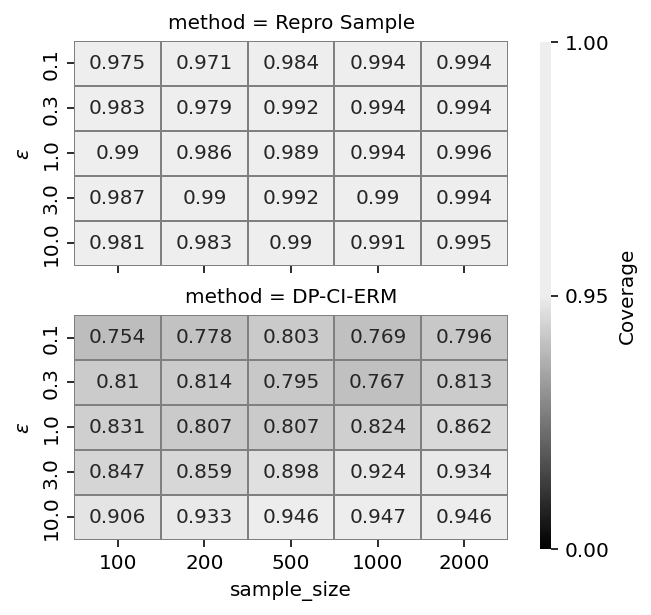

In [16]:

fg = sns.FacetGrid(logistic_data, row='method', height=2.2, aspect=1.7)
rdgn = sns.color_palette("blend:#000000,#eeeeee,#eeeeee", as_cmap=True)
divnorm = TwoSlopeNorm(vmin=0, vcenter=0.95, vmax=1)
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    ax = sns.heatmap(d, **kwargs, linewidths=1, linecolor='grey', fmt='g', norm=divnorm) 

    
cax = fg.fig.add_axes([1.02, .12, .02, .8])
fg.map_dataframe(draw_heatmap, 'sample_size', 'ep', 'coverage', 
                 annot=True, 
                 cbar_ax=cax,
                 cbar_kws={'label': 'Coverage', 
                           "ticks":[0, 0.95,1]}, 
                 cmap=rdgn) 
fg.set(ylabel = r'$\epsilon$')

plt.savefig('logistic_coverage.pdf', bbox_extra_artists=(cax,),  bbox_inches='tight')